**CitiGroup Stock Market Analysis (1st Of Jan. 2012 - 31st Of Dec. 2022)**

In this project, I analyze data from the stock market for CitiGroup between the 
period from January 1, 2012 to December 31, 2022. 

I used Pandas to extract data from the Alphantage API, analyze the information, visualize it, and give an interpretation of the analysis.

Here are some of the questions I try to answer:
* What year has the highest returns and volume of trade? 
* What was the change in a stock's price over time?
* What day of the week, and what month has the highest stock trade volume?
* What was the correlation between daily returns and volume traded?
* How did Citigroup perform during the time period under consideration? 




In [1]:
#IMPORT NECCESARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.plotting import table
import pandas_datareader.data as web

In [2]:
#Extract CitiGroup stock data from alphavantage API.
#The data extracted is for the period from 1st of Jan 2012 to 31st of Jan 2022
CitiGroupStock= web.DataReader("C", "av-daily-adjusted", start=datetime(2012, 1, 1), end=datetime(2022, 1, 31),  api_key="EHNXPEYMXK4SRLU9")


In [3]:
#Check the info of  CitiGroupStock data
CitiGroupStock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2537 entries, 2012-01-03 to 2022-01-31
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               2537 non-null   float64
 1   high               2537 non-null   float64
 2   low                2537 non-null   float64
 3   close              2537 non-null   float64
 4   adjusted close     2537 non-null   float64
 5   volume             2537 non-null   int64  
 6   dividend amount    2537 non-null   float64
 7   split coefficient  2537 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 178.4+ KB


No missing info in the dataframe above, so we can go ahead with our business.




In [4]:
CitiGroupStock.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
2012-01-03,27.13,28.51,27.13,28.33,23.204772,58169500,0.0,1.0
2012-01-04,28.04,28.38,27.62,28.17,23.073718,41455000,0.0,1.0
2012-01-05,27.66,29.18,27.47,28.51,23.352208,66793300,0.0,1.0
2012-01-06,28.66,29.06,28.01,28.55,23.384972,48226900,0.0,1.0
2012-01-09,28.72,29.38,28.65,29.08,23.819089,35017900,0.0,1.0


In [5]:
# Sort DataFrame in ascending order by date 
CitiGroupStock.sort_index(ascending=True, inplace=True)

# Calculate stock return, Create a "return" column
CitiGroupStock["return"] = CitiGroupStock["close"].pct_change() * 100
#drop empty column
CitiGroupStock.dropna(axis=0, inplace=True)  
print("CitiGroupStock:", CitiGroupStock.shape)
CitiGroupStock.head()

CitiGroupStock: (2536, 9)


,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,return
2012-01-04,28.04,28.38,27.62,28.17,23.073718,41455000,0.0,1.0,-0.564772
2012-01-05,27.66,29.18,27.47,28.51,23.352208,66793300,0.0,1.0,1.206958
2012-01-06,28.66,29.06,28.01,28.55,23.384972,48226900,0.0,1.0,0.140302
2012-01-09,28.72,29.38,28.65,29.08,23.819089,35017900,0.0,1.0,1.856392
2012-01-10,29.75,30.14,29.66,30.00,24.572650,47710900,0.0,1.0,3.163686


In [6]:
#Convert the index to datetime
CitiGroupStock.index = pd.to_datetime(CitiGroupStock.index)

#Rename the index of CitiGroupStock data to date
CitiGroupStock.index.name="date" 
CitiGroupStock.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,return
date,,,,,,,,,
2012-01-04,28.04,28.38,27.62,28.17,23.073718,41455000,0.0,1.0,-0.564772
2012-01-05,27.66,29.18,27.47,28.51,23.352208,66793300,0.0,1.0,1.206958
2012-01-06,28.66,29.06,28.01,28.55,23.384972,48226900,0.0,1.0,0.140302
2012-01-09,28.72,29.38,28.65,29.08,23.819089,35017900,0.0,1.0,1.856392
2012-01-10,29.75,30.14,29.66,30.00,24.572650,47710900,0.0,1.0,3.163686


**Exploratory Data Analysis (EDA)**




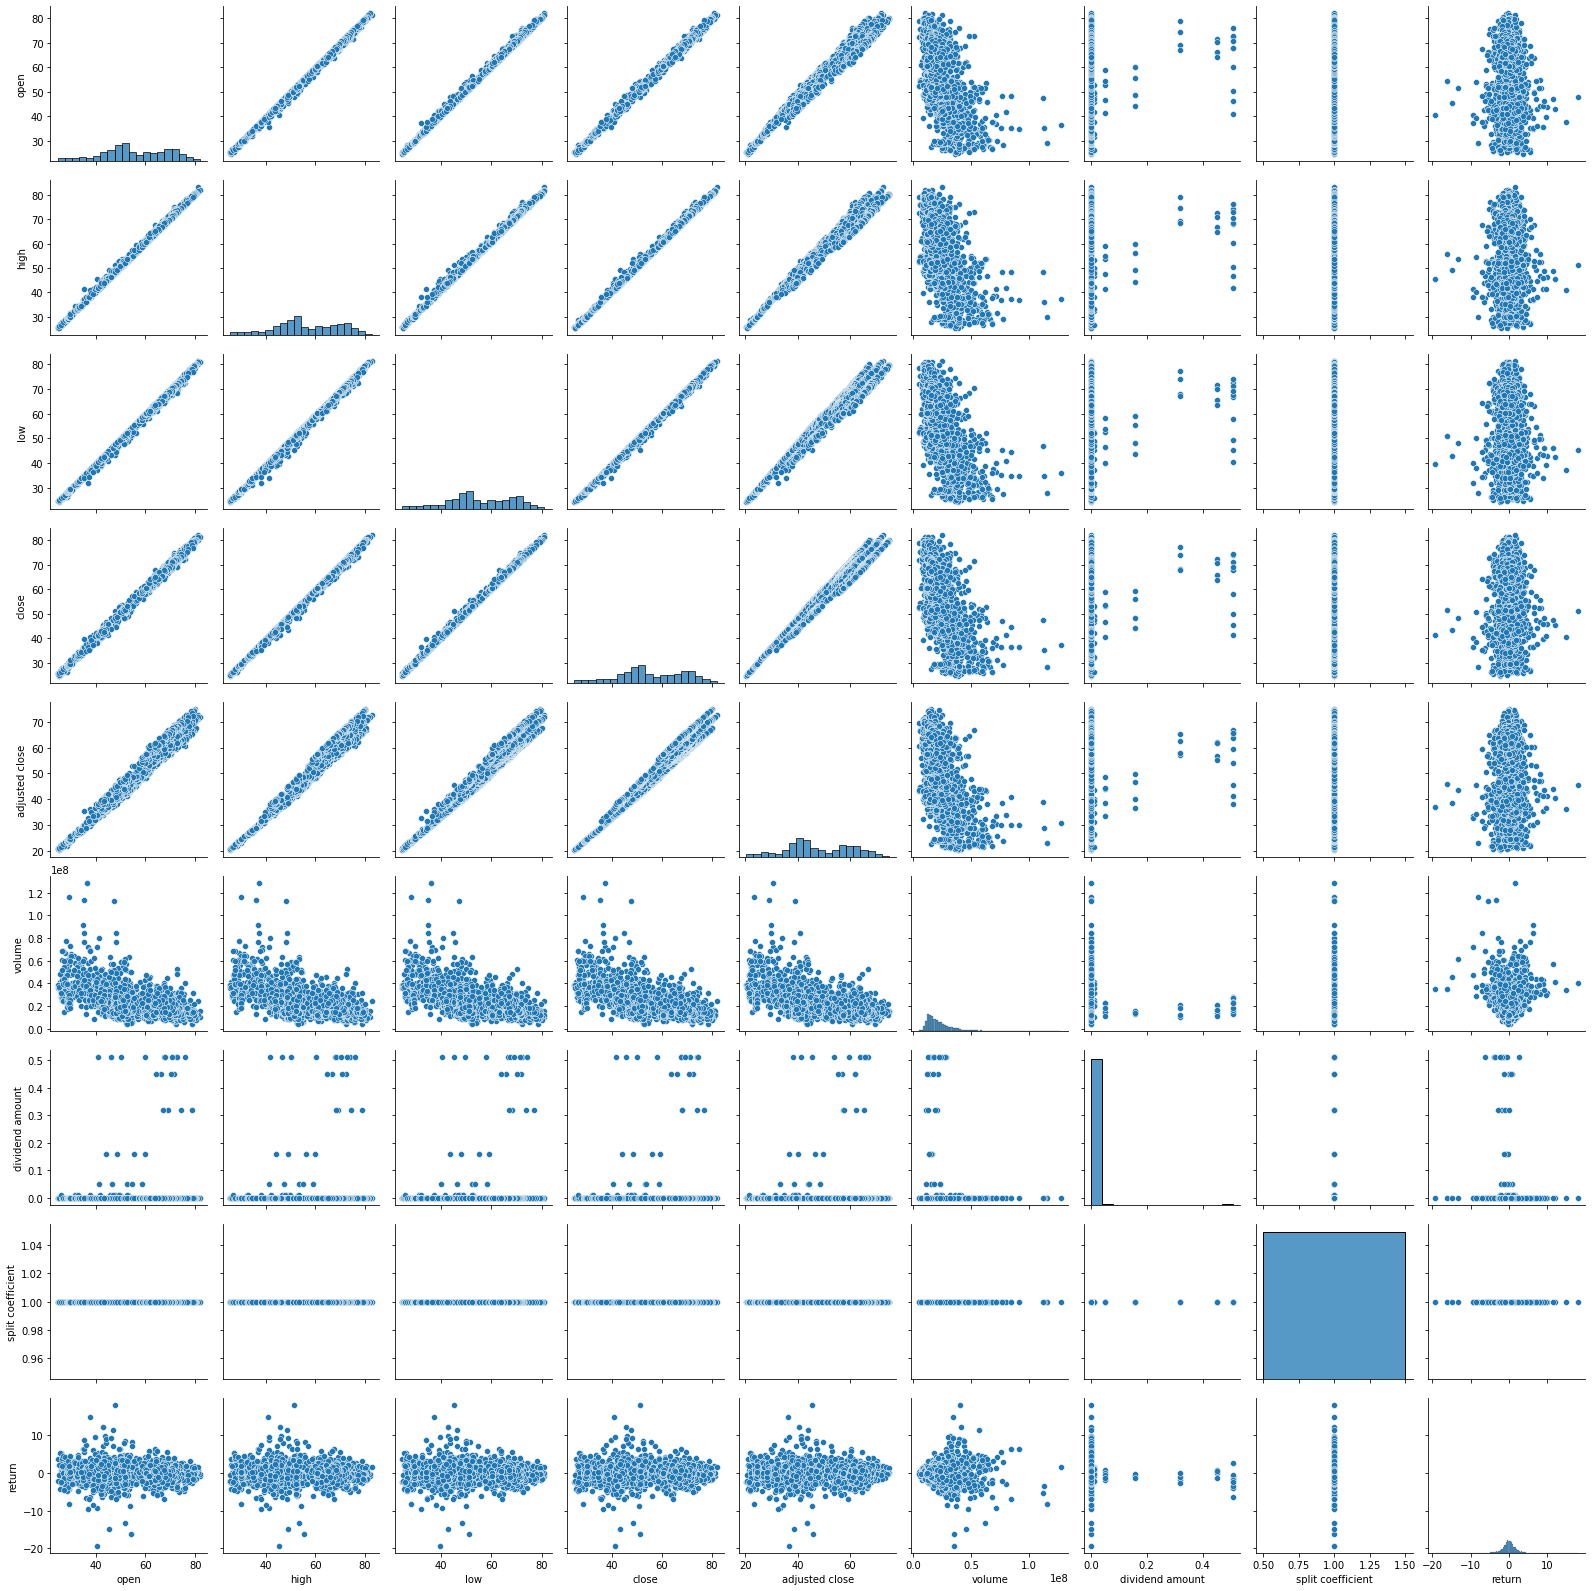

In [7]:
sns.pairplot(CitiGroupStock);

In [8]:
#It will be advisable to drop the split coefficient, and dividend amount columns, they dont really have effect in the analysis
CitiGroupStock.drop(columns=["split coefficient","dividend amount"], inplace=True);
CitiGroupStock.head()

,open,high,low,close,adjusted close,volume,return
date,,,,,,,
2012-01-04,28.04,28.38,27.62,28.17,23.073718,41455000,-0.564772
2012-01-05,27.66,29.18,27.47,28.51,23.352208,66793300,1.206958
2012-01-06,28.66,29.06,28.01,28.55,23.384972,48226900,0.140302
2012-01-09,28.72,29.38,28.65,29.08,23.819089,35017900,1.856392
2012-01-10,29.75,30.14,29.66,30.00,24.572650,47710900,3.163686


In [9]:
#Reset index of the data
CitiGroupStock.reset_index(inplace=True)
CitiGroupStock.head()

,date,open,high,low,close,adjusted close,volume,return
0,2012-01-04,28.04,28.38,27.62,28.17,23.073718,41455000,-0.564772
1,2012-01-05,27.66,29.18,27.47,28.51,23.352208,66793300,1.206958
2,2012-01-06,28.66,29.06,28.01,28.55,23.384972,48226900,0.140302
3,2012-01-09,28.72,29.38,28.65,29.08,23.819089,35017900,1.856392
4,2012-01-10,29.75,30.14,29.66,30.00,24.572650,47710900,3.163686


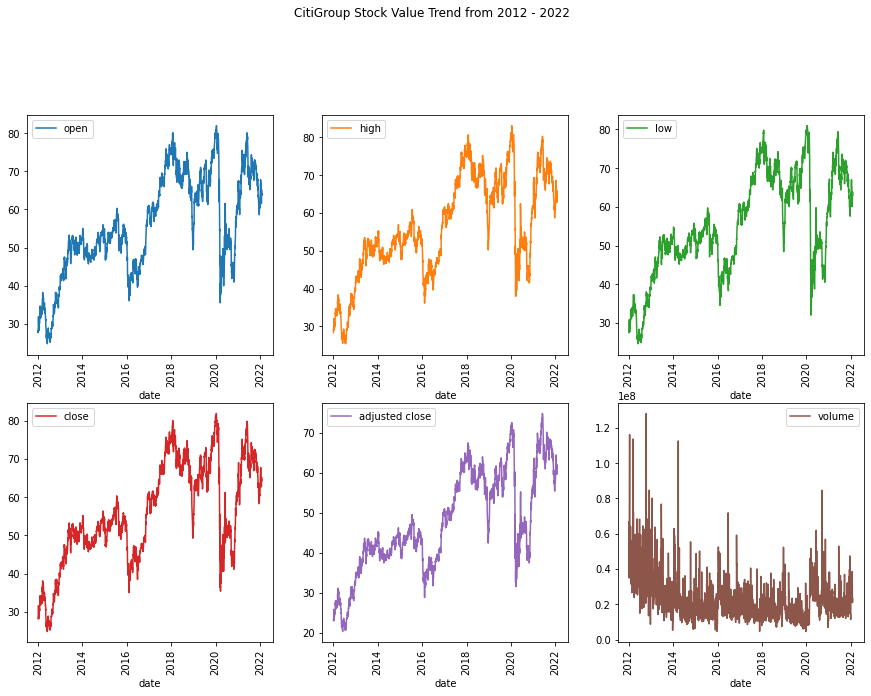

In [10]:
# Create a list for numerical columns that are to be visualized
Column_List = ['open', 'high', 'low', 'close', 'adjusted close', 'volume']

# Plot to view the same
CitiGroupStock.plot(x = 'date', y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "CitiGroup Stock Value Trend from 2012 - 2022", rot = 90);

In [11]:
#Check for factors responsible in overall volume trade
# Perform default correlation using Pearson Method
corr_matrix = CitiGroupStock.corr()
corr_matrix 

,open,high,low,close,adjusted close,volume,return
open,1.000000,0.999215,0.998990,0.998181,0.983451,-0.547348,-0.022715
high,0.999215,1.000000,0.998690,0.999035,0.985423,-0.539575,-0.004649
low,0.998990,0.998690,1.000000,0.999138,0.982621,-0.560304,-0.000378
close,0.998181,0.999035,0.999138,1.000000,0.984813,-0.551415,0.020608
adjusted close,0.983451,0.985423,0.982621,0.984813,1.000000,-0.512733,0.018020
volume,-0.547348,-0.539575,-0.560304,-0.551415,-0.512733,1.000000,-0.035163
return,-0.022715,-0.004649,-0.000378,0.020608,0.018020,-0.035163,1.000000


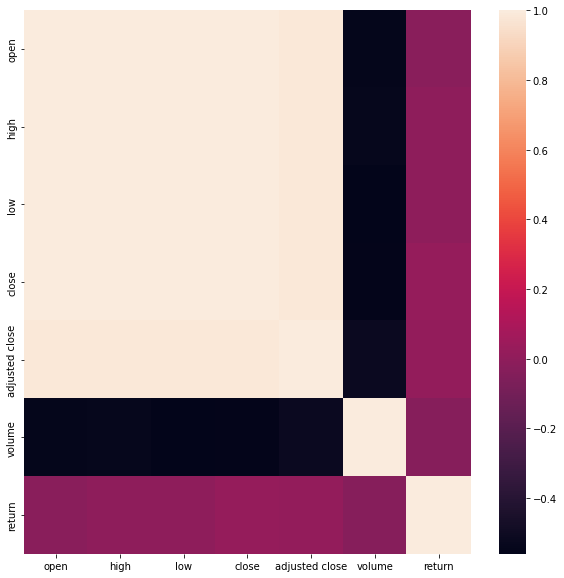

In [12]:
# Plot the correlation matrix in a heatmap to understand better
fig, ax = plt.subplots (figsize = (10, 10))

sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values);

**Extensive Histroical Analysis of the stock Data to find pattern**


In [13]:
"""
Since a the data is a time series one(Data that change with time),
It will be neccessary to convert the index to date format(datetime format) so as to get 
a better analysis of the parten per day
"""

CitiGroupStock.set_index("date")

,open,high,low,close,adjusted close,volume,return
date,,,,,,,
2012-01-04,28.04,28.38,27.62,28.17,23.073718,41455000,-0.564772
2012-01-05,27.66,29.18,27.47,28.51,23.352208,66793300,1.206958
2012-01-06,28.66,29.06,28.01,28.55,23.384972,48226900,0.140302
2012-01-09,28.72,29.38,28.65,29.08,23.819089,35017900,1.856392
2012-01-10,29.75,30.14,29.66,30.00,24.572650,47710900,3.163686
...,...,...,...,...,...,...,...
2022-01-25,61.97,64.46,61.13,64.11,61.032892,34371071,2.248804
2022-01-26,64.70,65.78,63.87,64.75,61.642174,31803388,0.998284
2022-01-27,65.22,65.85,63.90,64.15,61.070972,24681294,-0.926641


In [14]:
#To calculate the high and low columns
# Sort DataFrame ascending by date
CitiGroupStock.sort_index(ascending=True, inplace=True)

# Create "return" column

CitiGroupStock["return"] = CitiGroupStock["close"].pct_change() * 100

print("CitiGroupStock:", CitiGroupStock.shape)

CitiGroupStock: (2536, 8)


In [15]:
CitiGroupStock.dropna(inplace=True) #drop null rows
CitiGroupStock.head()

,date,open,high,low,close,adjusted close,volume,return
1,2012-01-05,27.66,29.18,27.47,28.51,23.352208,66793300,1.206958
2,2012-01-06,28.66,29.06,28.01,28.55,23.384972,48226900,0.140302
3,2012-01-09,28.72,29.38,28.65,29.08,23.819089,35017900,1.856392
4,2012-01-10,29.75,30.14,29.66,30.00,24.572650,47710900,3.163686
5,2012-01-11,29.77,31.45,29.74,31.27,25.612892,72656000,4.233333


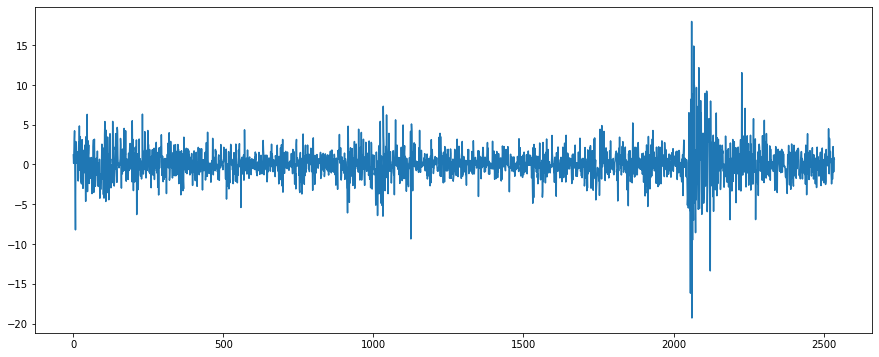

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
CitiGroupStock["return"].plot(ax=ax);

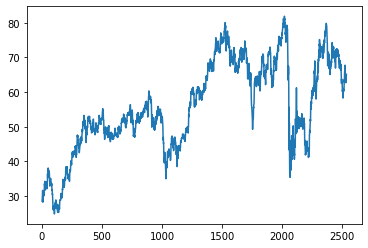

In [17]:
CitiGroupStock["close"].plot();

In [18]:
# Decompose the time series year-wise, month-wise, week-wise to analyse further
CitiGroupStock['Year'] = CitiGroupStock['date'].dt.year 
CitiGroupStock['Month'] = CitiGroupStock['date'].dt.month
CitiGroupStock['Weekday'] = CitiGroupStock['date'].dt.weekday

In [19]:
CitiGroupStock.head()

,date,open,high,low,close,adjusted close,volume,return,Year,Month,Weekday
1,2012-01-05,27.66,29.18,27.47,28.51,23.352208,66793300,1.206958,2012,1,3
2,2012-01-06,28.66,29.06,28.01,28.55,23.384972,48226900,0.140302,2012,1,4
3,2012-01-09,28.72,29.38,28.65,29.08,23.819089,35017900,1.856392,2012,1,0
4,2012-01-10,29.75,30.14,29.66,30.00,24.572650,47710900,3.163686,2012,1,1
5,2012-01-11,29.77,31.45,29.74,31.27,25.612892,72656000,4.233333,2012,1,2


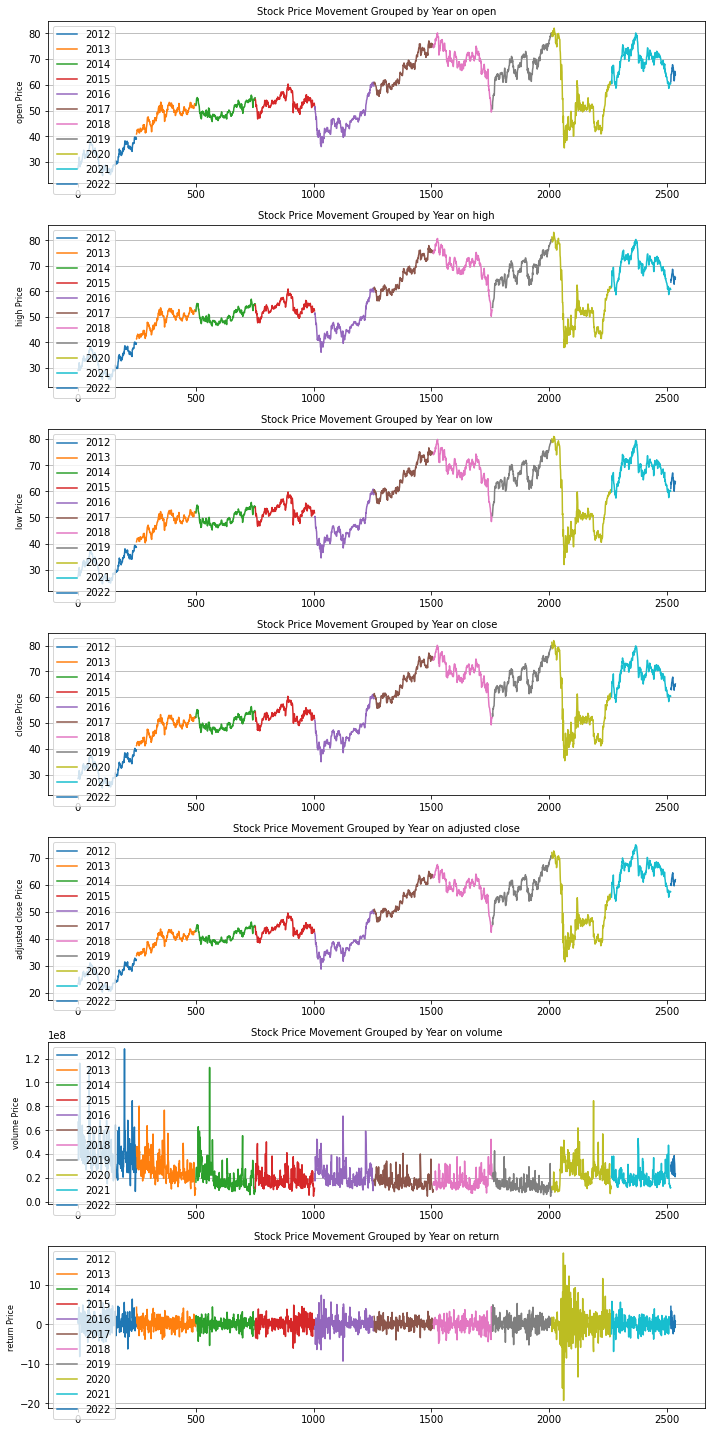

In [20]:
# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
Column_List_2 = ['open', 'high', 'low', 'close', 'adjusted close', 'volume', 'return']

fig, ax = plt.subplots(len(Column_List_2), figsize = (10, 20))

# Group the data by year and plot
for i, col_list in enumerate(Column_List_2):
    CitiGroupStock.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

**Year Analysis of Stock Data Interpretation** 

1. Starting from 2012, there was a continuous rise (increment) in the stock prices (open, high, low, close, and adjusted closed).
At the beginning (around the 1st quarter) of 2016, there was a significant drop in stock prices (open, high, low, close, and adjusted closed), but they later increased before the end of the year.

2. There was a dip in the prices of stocks (open, high, low, close, and adjusted closed) at the end of 2018. In fact, the stock price annual change decrement was worse than that of COVID's 19 pandemic year period (2020).

3. Looking for more information about the company stock market loss in 2018, I came across this article, which explained the most likely causes of the loss. [Click here](https://finance.yahoo.com/news/big-events-shook-financial-markets-094700140.html?guce_referrer=aHR0cHM6Ly93d3cuYmluZy5jb20v&guce_referrer_sig=AQAAAMY0jcl6jXArDcodYOc8_mod8J7AmjEy6cH2FIz6cFYLcVfX-A3ZHKvPJtmuiQxKnS5JoOQtHUsFdcAgC1elqBr_WAIhmrcQ2adus6yebg5zobmiZbCCTXDTQIaayzJDzEhcA_kbz7HdFTnIrUm6mqAhDLJyHetGo8WlrlIvDL3K&guccounter=2)

**NOTE:**

They are alot of factors that affect stock market, so i am not saying this article stated the factors but i mean it ascertain the fact that citigroup suffered a big lost in 2018. And to explain the full details of what might cause this lost is beyond this project scope.


**In conclusion**, Citigroup recorded a huge drop in price in the following year:2018; 2020; and 2016 (decrement order is dropped).



In [21]:
return_stock=CitiGroupStock.groupby("Year").sum().sort_values(by = "return")
return_stock

,open,high,low,close,adjusted close,volume,return,Month,Weekday
Year,,,,,,,,,
2018,17463.1700,17632.2750,17272.2850,17434.5900,14859.722014,4366170377,-32.835080,1633,508
2020,13622.6400,13839.8987,13371.8550,13592.4500,12285.633473,6319424663,-2.934860,1656,508
2015,13432.0400,13543.7352,13305.1961,13425.7700,11043.980749,4643605294,-1.519547,1655,505
2021,17486.5356,17659.0490,17272.7892,17462.3200,16404.734870,5038242379,1.283578,1659,509
2014,12649.0901,12749.6322,12552.9547,12648.8900,10387.219628,5166855469,5.852464,1651,506
2022,1293.9100,1314.2799,1277.4000,1298.1500,1235.842287,563747923,7.840131,20,40
2016,11677.4150,11808.9506,11554.8409,11689.3000,9672.036416,5569815513,18.902211,1652,513
2017,16491.4750,16622.5913,16365.3300,16490.5800,13815.327985,4196138685,24.034840,1640,512
2013,12158.8299,12271.0022,12040.8350,12160.6598,9978.164575,6885696600,30.187997,1649,508



**Table Interpretation**
1. According to the table above, the most negative value (loss) for return is in 2018 (-32.835080), followed by the pandemic period 2020 (-2.934860), and finally in 2015 (-1.519547).

2. 2019 has the highest positive (gain) value with a return value of 45.820046.It means Citigroup's biggest gain comes after its worst loss in 2018 for the analyzed period (2012–2022). What a big recovery and momentum!

 





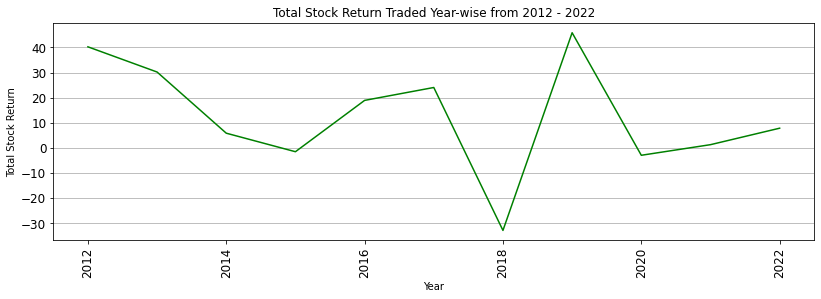

In [22]:
# Visualzing only the total stock return traded grouped year-wise
year = CitiGroupStock.groupby('Year')['return'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
year.plot(fontsize = 12, sharex = False, title = "Total Stock Return Traded Year-wise from 2012 - 2022", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Return")
ax1.yaxis.grid(True)

*From the plot above, 2018 had the lowest stock return, and 2019 had the highest stock return.*

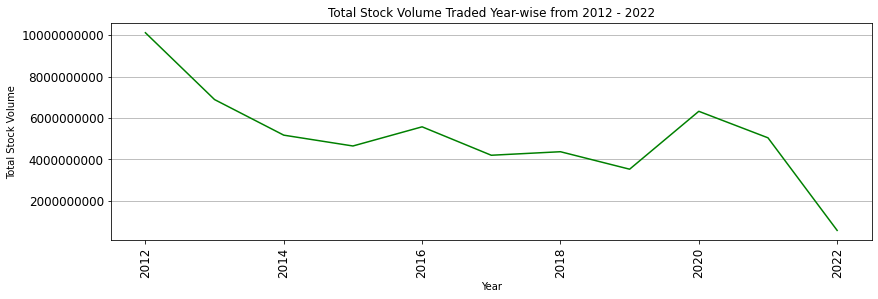

In [23]:
# Visualzing only the total stock volume traded grouped year-wise
year = CitiGroupStock.groupby('Year')['volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
year.plot(fontsize = 12, sharex = False, title = "Total Stock Volume Traded Year-wise from 2012 - 2022", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volume")
ax1.yaxis.grid(True)

*CitiGroup has its highest stock volume in 2012; interestingly, they have their lowest stock volume in 2019 but the highest return for the period of 2012–2022.*

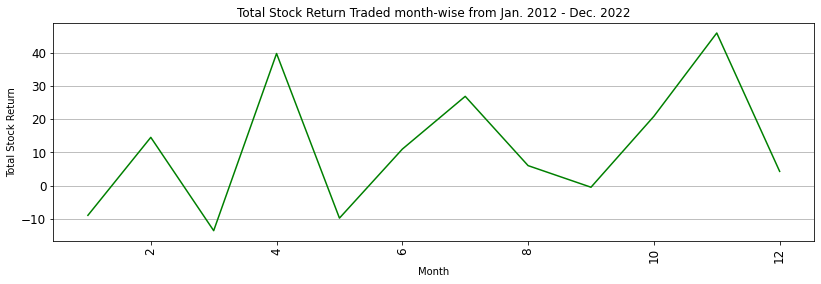

In [24]:
# Visualzing only the total stock return traded grouped month-wise
month = CitiGroupStock.groupby('Month')['return'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
month.plot(fontsize = 12, sharex = False, title = "Total Stock Return Traded month-wise from Jan. 2012 - Dec. 2022", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Return")
ax1.yaxis.grid(True)

In [25]:
month = CitiGroupStock.groupby('Month')['return'].sum().sort_values(ascending=False)
month

Month
11    46.057041
4     39.862007
7     26.939213
10    20.914711
2     14.568945
6     11.019193
8      6.034260
12     4.300632
9     -0.484400
1     -8.962355
5     -9.805181
3    -13.590518
Name: return, dtype: float64



*There is a high return for stock traded in November, April, and July. While March has the least return of stock traded for the period of January 2012 through December 2022.*

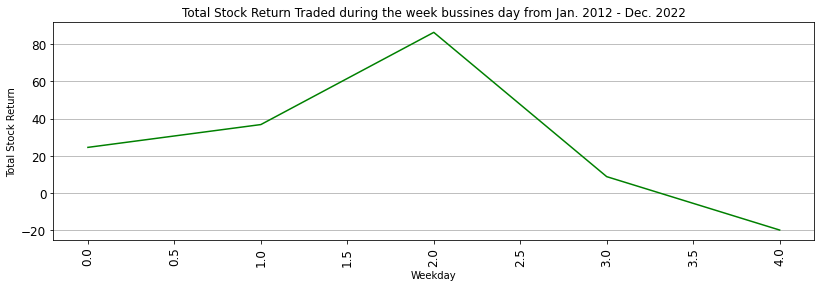

In [26]:
# Visualzing only the total stock return traded grouped month-wise
weekday = CitiGroupStock.groupby('Weekday')['return'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
weekday.plot(fontsize = 12, sharex = False, title = "Total Stock Return Traded during the week bussines day from Jan. 2012 - Dec. 2022", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Return")
ax1.yaxis.grid(True)

In [27]:
Weekdays = CitiGroupStock.groupby('Weekday')['return'].sum().sort_values(ascending=False)
Weekdays

Weekday
2    86.324821
1    36.835338
0    24.593806
3     8.880041
4   -19.780457
Name: return, dtype: float64

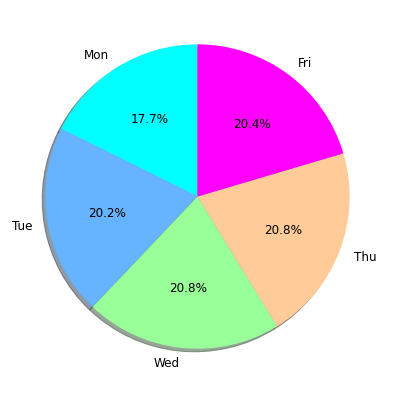

In [28]:
# Analyse Volume trade based on WeekDays in (Jan. 2012 - Dec. 2022)
for i, col_list in enumerate(Column_List):
    var2 = CitiGroupStock.groupby('Weekday')[col_list].sum()
    var2.head()


import matplotlib.pyplot as plt
label2 = ["Mon", "Tue", "Wed", "Thu", "Fri"]
colors = ['#00FFFF','#66b3ff','#99ff99','#ffcc99', '#FF00FF']

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(var2, labels=label2, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90, textprops={'fontsize': 12})
plt.show();


In [29]:
 var2.head()

Weekday
0     9959262572
1    11418304061
2    11755915447
3    11742090506
4    11511780192
Name: volume, dtype: int64

Wednesday had approximately the highest stock volume traded during the study period, followed by Thursday and then Friday. Monday has the lowest stock volume traded, followed by Tuesday

**NOTE:** There is no trading of stock during the weekends (Saturday and Sunday)

<ipython-input-30-766e15f4d88f>:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(var3, labels=label3, autopct='%1.1f%%', colors = colors, shadow=True, startangle=90, textprops={'fontsize': 12})


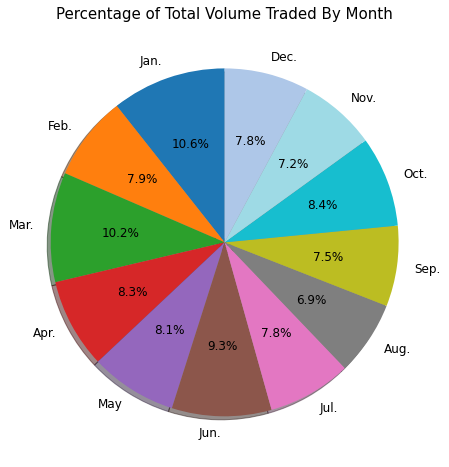

In [30]:
for i, col_list in enumerate(Column_List):
    var3 = CitiGroupStock.groupby('Month')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var3 = pd.DataFrame(var3)

label3=["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#9edae5", "#aec7e8"] 

fig1, ax1 = plt.subplots(figsize=(13,8))
ax1.pie(var3, labels=label3, autopct='%1.1f%%', colors = colors, shadow=True, startangle=90, textprops={'fontsize': 12})
ax1.set_title("Percentage of Total Volume Traded By Month", fontsize=15)

plt.show();

<ipython-input-31-f6e8b60d3fed>:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(var, labels=var.index, autopct='%1.1f%%', colors=color2,


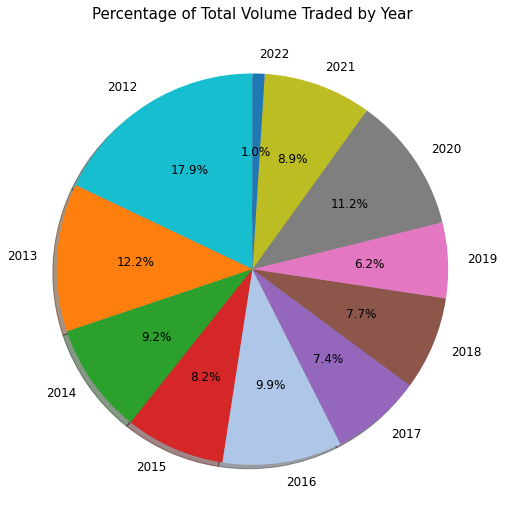

In [31]:
# Analyse Volume trade based on Year(2012-2022)
for i, col_list in enumerate(Column_List):
    var = CitiGroupStock.groupby('Year')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)
color2 = ["#17becf", "#ff7f0e", "#2ca02c", "#d62728","#aec7e8","#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#1f77b4", "#9edae5", "#d62728"] 

fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(var, labels=var.index, autopct='%1.1f%%', colors=color2,
        shadow=True, startangle=90, textprops={'fontsize': 12})
ax1.set_title("Percentage of Total Volume Traded by Year", fontsize=15);

**Volume Traded Analysis of Citigroup Stock Data**

2012 has the highest volume of trade, while 2022 has the lowest.

1.   2012 has the highest volume of trade, while 2022 has the lowest
2.   Wednesday (2) has the highest volume of trade per business day, followed by Thursday (3), while Monday (0) has the lowest volume of trade per business day, while Monday (0) has the lowest volume of trade per business day.


**NOTE:** Stocks are traded for five business days (Monday through Friday).